In [ ]:
import numpy as np

samples = ['The cat sat on the mat.', 'The dog ate my homework.']

## Assigning unique index to word
token_idx = {}
for sample in samples:
    for word in sample.split():
        if word not in token_idx:
            token_idx[word] = len(token_idx) + 1

length = 10

results = np.zeros(shape=(len(samples),length, max(token_idx.values()) +1))

for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:length]:
        idx = token_idx.get(word)
        results[i,j,idx] = 1.


In [ ]:
## Character-level one-hot encoding

import string

samples = ['The cat sat on the mat.', 'The dog ate my homework.']
chars = string.printable ## all chars
token_idx = dict(zip(range(1, len(chars) +1), chars))

length = 50

results = np.zeros((len(samples), length, max(token_idx.keys()) + 1 ))

for i, sample in enumerate(samples):
    for j,character in enumerate(sample):
        idx = token_idx.get(character)
        results[i,j,idx] = 1.


In [ ]:
from keras.preprocessing.text import Tokenizer

samples = ['The cat sat on the mat.', 'The dog ate my homework.']

tokenizer = Tokenizer(num_words = 10000)
tokenizer.fit_on_texts(samples) ## word index

seq = tokenizer.texts_to_sequences(samples) ## palabras en vectores de indices

one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary') ## directamente a matriz

word_idx = tokenizer.word_index
print('Found %s unique tokens' % len(word_idx))

In [ ]:
##One hot hashing trick
##Se realiza mediante una funcion de hashing. La principal ventaja es ahorrar espacio y poder hacer el encoding sin que se tenga todos los datos disponibles

samples = ['The cat sat on the mat.', 'The dog ate my homework.']

dimensions = 1000 ## vectores de tamano 1000
length = 10

results = np.zeros((len(samples), length, dimensions))
for i,sample in enumerate(samples):
    for j,word in list(enumerate(sample.split()))[:length]:
        idx = abs(hash(word)) % dimensions ## index random entre 0 y 1000
        results[i,j,idx] = 1.


In [5]:
## Capa Embedding para dataset IMDB

from keras.datasets import imdb
from keras import preprocessing

max_features = 10000
length = 20

(x_train, y_train) , (x_test, y_test) = imdb.load_data(num_words= max_features)

##Train y test sera un tensor tipo (numero_seq, 20)
print(x_train)

[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])
 list([1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 

In [7]:
print(type(x_train),type(y_train))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [ ]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

model = Sequential()
model.add(Embedding(10000,8,input_length = length))

model.add(Flatten()) ## lo transforma en (10000,8*length)

model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

model.summary()
 

In [ ]:
history = model.fit(x_train, 
                   y_train, 
                   epochs = 10,
                   validation_split=0.2)

In [ ]:
## Solo empleando las 20 primeras palabras de cada review nos ha salido un accuracy de 87%.Seria mejor emplear redes conv 1d o capas recurrentes.

In [ ]:
import os

imdb_dir = '/home/zan/Desktop/dl_autoencoder/docs/DeepLearningFC/aclImdb'
train_dir = os.path.join(imdb_dir,'train')

labels = []
texts = []

for label_type in ['pos', 'neg']:
    dir_name = os.path.join(train_dir,label_type)
    for file_type in os.listdir(dir_name):
        if file_type[-4:] == '.txt':
            fich = open(os.path.join(dir_name,file_type))
            texts.append(fich.read())
            if label_type == 'pos':
                labels.append(1)
            else:
                labels.append(0)

In [27]:
## Tokenizar texto

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

import numpy as np

maxlen = 100 ## Texto maximo para una opinion
training_samples = 500 ## Entrenar 200 samples, luego se ha modificado en 500
validation_samples = 10000 ## Validar con 10000
max_words = 10000 ## Considerar los primeros 10.000 palabras mas comunes del dataset

tokenizer = Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(texts)
seqs = tokenizer.texts_to_sequences(texts)

word_idx = tokenizer.word_index
print('Number of indexes found: {}'.format(len(word_idx)))

data = pad_sequences(seqs, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data: {}'.format(data.shape))
print('Shape of label: {}'.format(labels.shape))

Number of indexes found: 88582
Shape of data: (25000, 100)
Shape of label: (25000,)


In [28]:
indxs = np.arange(data.shape[0]) ### mix data to be random
np.random.shuffle(indxs)

data = data[indxs]
labels = labels[indxs]

## Separar datos de entreno y validacion

x_train = data[:training_samples]
y_train = labels[:training_samples]

x_val = data[training_samples: training_samples  + validation_samples]
y_val = labels[training_samples : training_samples + validation_samples]



In [29]:
### Procedemos a descargar un embedding pre-computado de la pagina de GloVe

glove_dir = '/home/zan/Desktop/dl_autoencoder/docs/DeepLearningFC/glove.6B'

embeddings_indx = {}
fich = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
for each_line in fich:
    values = each_line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_indx[word] = coefs
fich.close()

print("There is a total of: {}".format(len(embeddings_indx)))

There is a total of: 400000


In [30]:
## Creamos una matriz de dimensiones max_words x embedding_dim

embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_idx.items():
    if i < max_words:
        embedding_v = embeddings_indx.get(word)
        if embedding_v is not None:
            embedding_matrix[i] = embedding_v ## anadir la palabra encontrada en el indice por su vector, en otro caso se dejaria en 0

In [31]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, Flatten

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length =maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_3 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [32]:
## El layer embedding es una matriz 2d con un indice y el vector correspondiente a ese indice

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

## Como tenemos una parte del modelo pre-entreando(Embedding) y otras random, las partes pre-entrenadas no se deben actualizar durante el entreno

In [33]:
##Entrenar modelo

model.compile(optimizer='rmsprop',loss='binary_crossentropy', 
metrics=['acc']) ##Medir el accuracy

history = model.fit(x_train,
                    y_train,
                    epochs=10,
                    batch_size = 32,
                    validation_data=(x_val,y_val))

model.save_weights('pre_trained_glove_model.h5')

Epoch 1/10
16/16 [==============================] - 1s 53ms/step - loss: 1.3642 - acc: 0.5160 - val_loss: 0.6938 - val_acc: 0.4996
Epoch 2/10
16/16 [==============================] - 1s 56ms/step - loss: 0.6845 - acc: 0.5560 - val_loss: 0.8394 - val_acc: 0.5023
Epoch 3/10
16/16 [==============================] - 1s 53ms/step - loss: 0.6713 - acc: 0.6080 - val_loss: 0.7265 - val_acc: 0.4972
Epoch 4/10
16/16 [==============================] - 1s 50ms/step - loss: 0.6405 - acc: 0.6680 - val_loss: 0.8945 - val_acc: 0.5014
Epoch 5/10
16/16 [==============================] - 1s 49ms/step - loss: 0.4774 - acc: 0.7800 - val_loss: 0.9249 - val_acc: 0.5016
Epoch 6/10
16/16 [==============================] - 1s 48ms/step - loss: 0.4517 - acc: 0.7720 - val_loss: 1.0806 - val_acc: 0.5021
Epoch 7/10
16/16 [==============================] - 1s 48ms/step - loss: 0.3282 - acc: 0.8420 - val_loss: 1.0575 - val_acc: 0.4970
Epoch 8/10
16/16 [==============================] - 1s 49ms/step - loss: 0.2154 - a

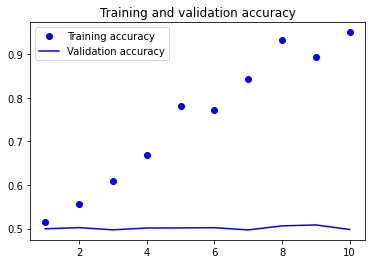

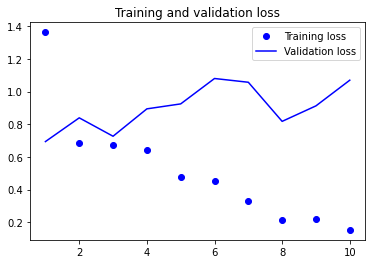

In [34]:
## Plot del resultado

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [38]:
## El modelo empieza a hacer overfitting bastante rapido. El accuracy del validation parece llegar al 55-60% como maximo.
## Tambien podemos hacer el modelo sin el pretrained word embedding, que en caso de que haya muchos datos podria resultar util.

from keras.models import Sequential
from keras.layers import Dense, Embedding, Flatten

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length =maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_5 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 32)                320032    
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [39]:
##Entrenar modelo

model.compile(optimizer='rmsprop',loss='binary_crossentropy', 
metrics=['acc']) ##Medir el accuracy

history = model.fit(x_train,
                    y_train,
                    epochs=50,
                    batch_size = 32,
                    validation_data=(x_val,y_val))

Epoch 1/50
16/16 [==============================] - 1s 70ms/step - loss: 0.6921 - acc: 0.5380 - val_loss: 0.6952 - val_acc: 0.4960
Epoch 2/50
16/16 [==============================] - 1s 70ms/step - loss: 0.4439 - acc: 0.9780 - val_loss: 0.7200 - val_acc: 0.4991
Epoch 3/50
16/16 [==============================] - 1s 61ms/step - loss: 0.1677 - acc: 0.9900 - val_loss: 0.7429 - val_acc: 0.4963
Epoch 4/50
16/16 [==============================] - 1s 63ms/step - loss: 0.0472 - acc: 1.0000 - val_loss: 0.7552 - val_acc: 0.4960
Epoch 5/50
16/16 [==============================] - 1s 64ms/step - loss: 0.0156 - acc: 1.0000 - val_loss: 0.8056 - val_acc: 0.4975
Epoch 6/50
16/16 [==============================] - 1s 73ms/step - loss: 0.0053 - acc: 1.0000 - val_loss: 0.8077 - val_acc: 0.4952
Epoch 7/50
16/16 [==============================] - 1s 62ms/step - loss: 0.0019 - acc: 1.0000 - val_loss: 0.8397 - val_acc: 0.4949
Epoch 8/50
16/16 [==============================] - 1s 67ms/step - loss: 7.2488e-04

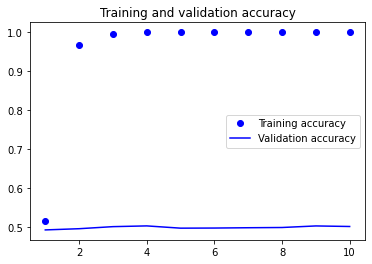

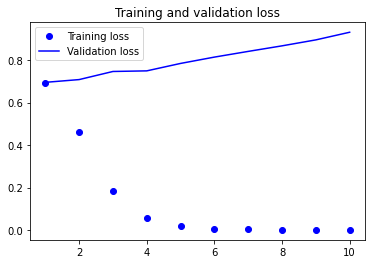

In [37]:
## Plot del resultado

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [40]:
## El accuracy de los validation se queda en los 50-53%, es decir, peor que con el modelo pre-entrenado. En caso de que se aumente el numero de pruebas de entreno,esto cambiara.

## Podemos evaluar el modelo en los datos de test


test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['pos', 'neg']:
    dir_name = os.path.join(train_dir,label_type)
    for file_type in sorted(os.listdir(dir_name)):
        if file_type[-4:] == '.txt':
            fich = open(os.path.join(dir_name,file_type))
            texts.append(fich.read())
            fich.close()
            if label_type == 'pos':
                labels.append(1)
            else:
                labels.append(0)
seqs = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(seqs, maxlen=maxlen)
y_test = np.asarray(labels)

In [41]:
## Evaluamos el modelo pre-entrenado anteriormente
model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 2ms/step - loss: 1.0911 - acc: 0.4982


[1.0910930633544922, 0.498199999332428]